<h3>1-Import Needed Libraries</h3>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

<h3>2-Load MNIST Dataset, Split it into Train & Test</h3>

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(
    "Training Data Shape is {} ,  Its Type Is {} ,\nTest Data Shape is {} , Its Type is {} ".format(
        train_images.shape, type(train_images) , test_images.shape , type(test_images)
    )
)

Training Data Shape is (60000, 28, 28) ,  Its Type Is <class 'numpy.ndarray'> ,
Test Data Shape is (10000, 28, 28) , Its Type is <class 'numpy.ndarray'> 


Dataset original size is : 60,000 samples for training and 10,000 samples for test.<br>
But for convenience, I will use only 10,000 samples for training and 1,000 samples for  test.

<h3>3-Display Images</h3>

In [4]:
def showImage(imgIndex):
    image = imgIndex
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

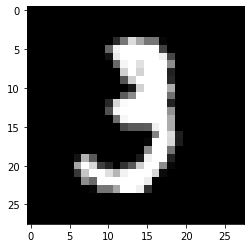

In [5]:
showImage(train_images[10])

In [6]:
train_labels[10]

3

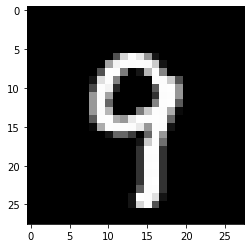

In [7]:
showImage(train_images[162])

In [8]:
train_labels[162]

9

<h3>4-Reshape Image To Smaller Grids </h3>

In [9]:
# This funstion will be used to reshape the images into 
# grid with dimensions row * col (7*7, 14*14, to be compatible with the original size 28*28 )
def reshapeImage(image , row , col ):
    x , y = image.shape
 # The assert statement is used to continue the execute if the given condition evaluates to True.
 # If the assert condition evaluates to False,
 # then it raises the AssertionError exception with the specified error message.
    assert x % row == 0, "{} rows is not evenly divisble by {}".format(x, row)
    assert y % col == 0, "{} cols is not evenly divisble by {}".format(y, col)

    return (image.reshape ( x //row, row, -1, col)
               .swapaxes(1,2)
               .reshape(-1, row, col))

In [10]:
print(reshapeImage(test_images[2] , 7 , 7 ).shape)
reshapeImage(test_images[2] , 7, 7 )


(16, 7, 7)


array([[[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,  38, 254, 109,   0,   0],
        [  0,   0,  87, 252,  82,   0,   0],
        [  0,   0, 135, 241,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
    

<h3>5-Feature Extraction</h3><br>

In this section, I will use the images, after being reshaped with the desired grid size, and for each block I will extract the centroid of it.<br><br>
<b>Return:</b> feature vector of each image contains the centroid of each block of this image.<br> <br>
Centroid is good geometry based feature, for the images with same hand written number the centroid values will be similar roughly, but for the other images, the values will be different, and this make the centroid good discriminant feature.

In [11]:
def calculateCentroid(image):
    
    featureVector = []
 
    for grid in reshapeImage(image , 7 , 7 ) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
    
        for index, x in np.ndenumerate(grid):
          sum+= x 
          Xc += x * index[0]
          Yc += x * index[1]
        
        if sum != 0 :
            featureVector.append( Xc/ sum )
            featureVector.append(Yc/ sum )
        else :
             featureVector.append(0)
             featureVector.append(0)
        
    
    return np.array(featureVector)

In [12]:
# Feature Extraction from training dataset
train_features = [calculateCentroid(img)  for img in train_images  ]


In [13]:
train_features = np.array(train_features)

In [14]:
train_features.shape

(60000, 32)

In [15]:
# Feature Extraction from test dataset
test_features = [calculateCentroid(img)  for img in test_images  ]

In [16]:
test_features = np.array(test_features)

In [17]:
test_features.shape

(10000, 32)

<h3>6-Classification Using KNN Classifier</h3>

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_features, train_labels)
# Calculate the accuracy of the model
print("Accuracy Score =", knn.score(test_features, test_labels) * 100, "%")


Accuracy Score = 91.16 %


<h3>7-Iterate Over Multiple Values of K to Find The Best<h3>

In [ ]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_labels)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(train_features, train_labels)
    test_accuracy[i] = knn.score(test_features, test_labels)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_features, train_labels)
# Calculate the accuracy of the model
print("Accuracy Score =", knn.score(test_features, test_labels) * 100, "%")


<h3>8-Conclusion<h3>
<b> 
1- Tha Dataset used is : MNIST Data set.<br>
        with 10,000 training samples and 1,000 test samples.<br>
    2-The feature used is the centroid of each block of the image.<br>
    3-The highest accuracy is 84.6% with k = 4.
    </b>
    